<a href="https://colab.research.google.com/github/kgudalewski/Stocks_analysis/blob/main/AAPL_stock_brief_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# !pip install yfinance==0.2.52
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [158]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"
# start_date = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%Y-%m-%d")
# end_date = (datetime.datetime.now()).strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)
data = data.droplevel(1,axis=1)

[*********************100%***********************]  1 of 1 completed


In [159]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009140,72.771768,71.783985,71.941351,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [161]:
data.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,152.099693,153.628459,150.393242,151.942833,9.061449e+07
std,41.998935,42.137927,41.773141,41.938210,5.325627e+07
min,54.449898,55.452163,51.595993,55.350239,2.323470e+07
25%,126.916977,128.007165,124.891203,126.388676,5.546960e+07
50%,150.734451,152.492157,148.730096,150.559444,7.629970e+07
75%,176.675095,178.382604,175.237269,176.521181,1.077601e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


In [162]:
data['Daily_Return'] = data['Close'].pct_change()
data['Rolling_Mean'] = data['Close'].rolling(window=20).mean()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data["Week"] = [pd.to_datetime(date).week for date in data.index]
data["Year"] = [pd.to_datetime(date).year for date in data.index]

def fix_weeks(row):
  if pd.to_datetime(row.name).month == 12 and row.Week == 1:
    return 52
  else:
    return row.Week

data['Week'] = data.apply(fix_weeks, axis=1)


In [163]:
filtered_data = data[data['Daily_Return'] > 0.02]
filtered_data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2020-01-09,74.962799,75.156480,74.132383,74.384166,170108400,0.021241,NaN,NaN,2.0,2020
2020-01-13,76.737427,76.764062,75.330800,75.449437,121532000,0.021365,NaN,NaN,3.0,2020
2020-01-28,76.914162,77.086054,75.582587,75.681851,162234000,0.028289,NaN,NaN,5.0,2020
2020-01-29,78.524139,79.373928,77.807512,78.550775,216229200,0.020932,NaN,NaN,5.0,2020
2020-02-04,77.194992,77.386257,75.931207,76.337940,136616400,0.033013,76.022854,0.018808,6.0,2020


In [165]:
def range_fn(x):
    return x.max() - x.min()

aggregated_df = data.groupby(['Year','Week'])['Close'].agg(['mean', 'min', 'max', range_fn])
aggregated_df.head()

mean        min        max  range_fn
Year Week                                           
2020 1.0   72.362602  72.009140  72.716064  0.706924
     2.0   73.664639  72.241562  75.132263  2.890701
     3.0   76.260483  75.376808  77.165947  1.789139
     4.0   76.977715  76.643005  77.286995  0.643990
     5.0   76.716115  74.798164  78.524139  3.725975

In [169]:
data.loc[((data.Year == 2024) & (data.Week == 1)) | ((data.Year == 2024) & (data.Week == 52))]
# check whether bad week description appears

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700,-0.035787,192.870527,0.012075,1.0,2024
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500,-0.007488,192.613072,0.012014,1.0,2024
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600,-0.012700,192.041007,0.011036,1.0,2024
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300,-0.004013,191.487331,0.011021,1.0,2024
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,0.003065,244.757892,0.008893,52.0,2024
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478,246.023002,0.008828,52.0,2024
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176,247.219685,0.008782,52.0,2024
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,-0.013242,248.251551,0.009615,52.0,2024
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,-0.013263,248.994234,0.010262,52.0,2024


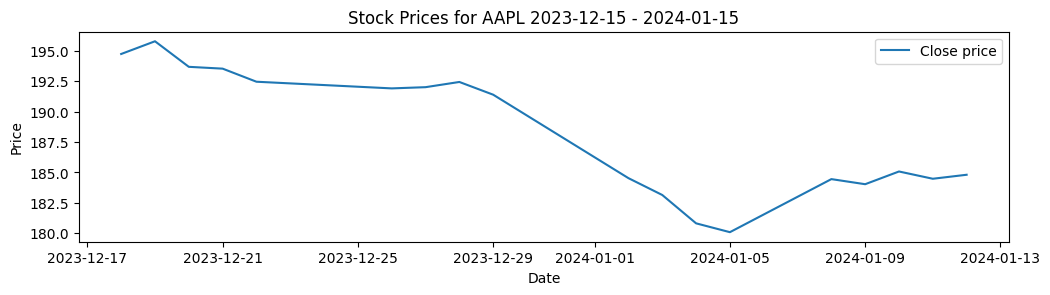

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data.loc[(data.index < '2024-01-15') & (data.index > '2023-12-15')]['Close'], label='Close price')
plt.title(f'Stock Prices for {ticker} 2023-12-15 - 2024-01-15')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


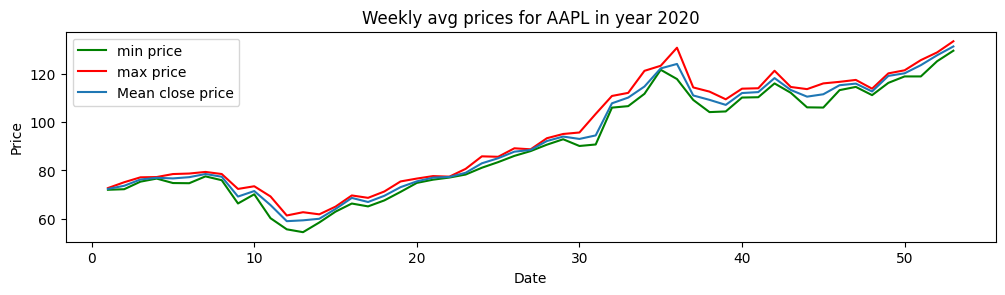

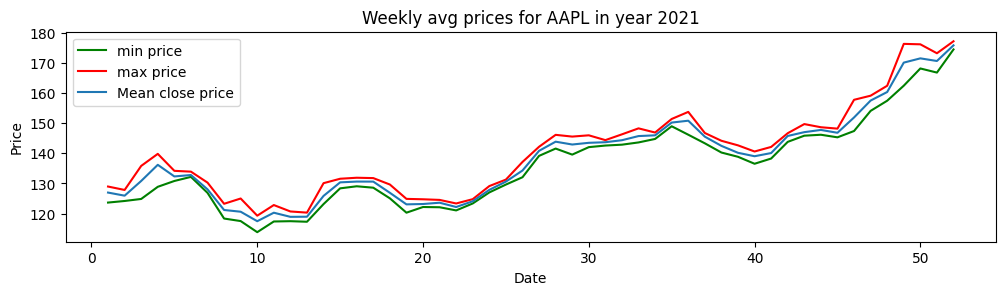

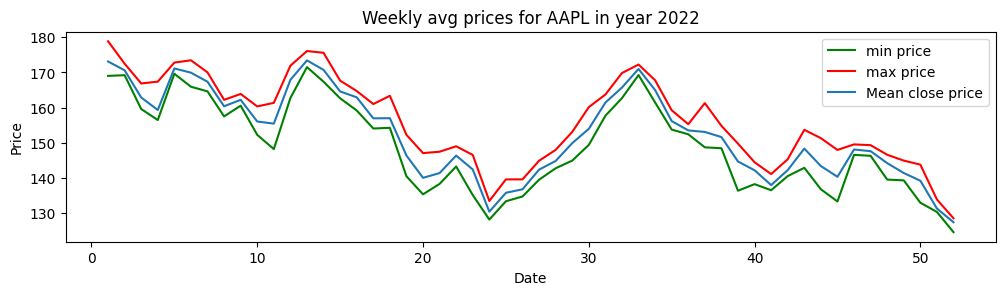

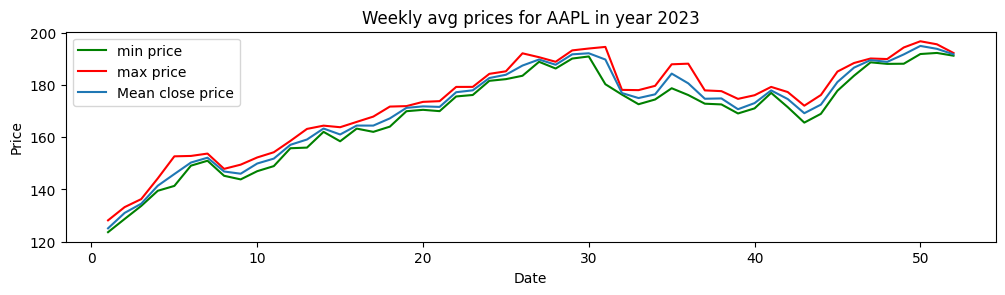

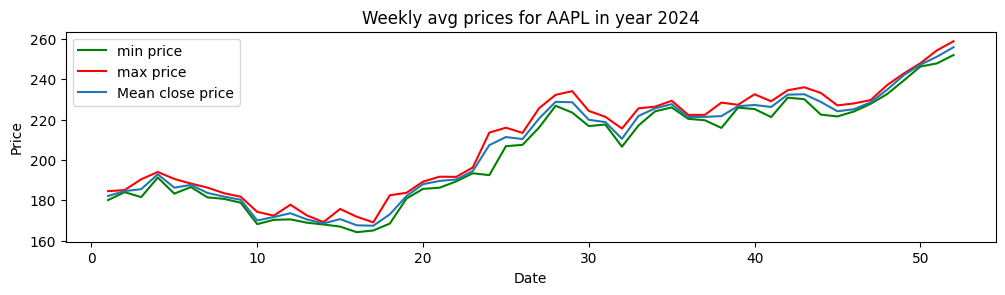

In [170]:
for year in aggregated_df.index.get_level_values('Year').unique():

  year_data = aggregated_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['min'], label='min price', color='green')
  plt.plot(year_data['max'], label='max price', color='red')
  plt.plot(year_data['mean'], label='Mean close price')
  plt.title(f'Weekly avg prices for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

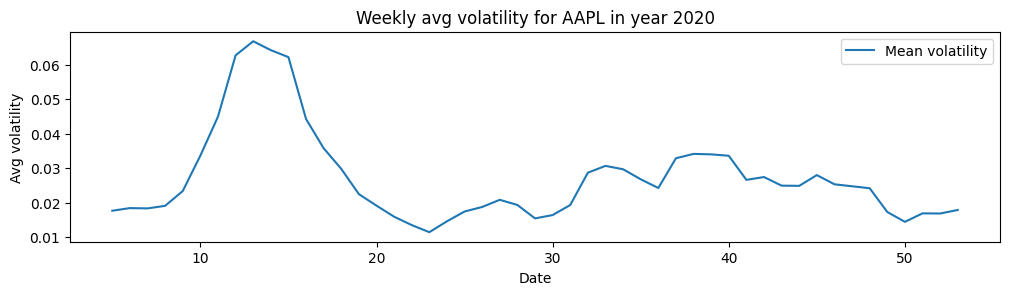

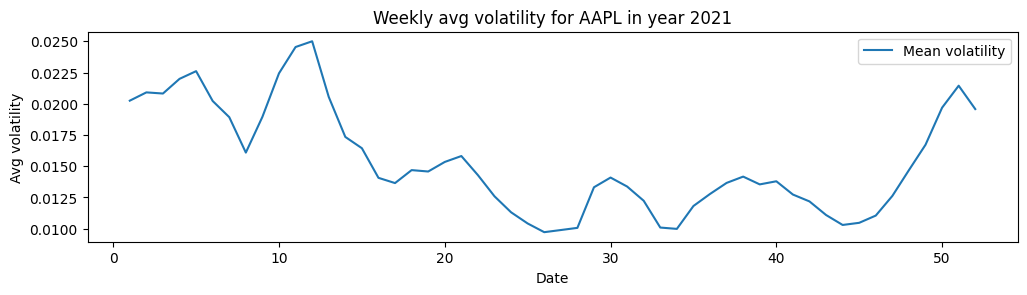

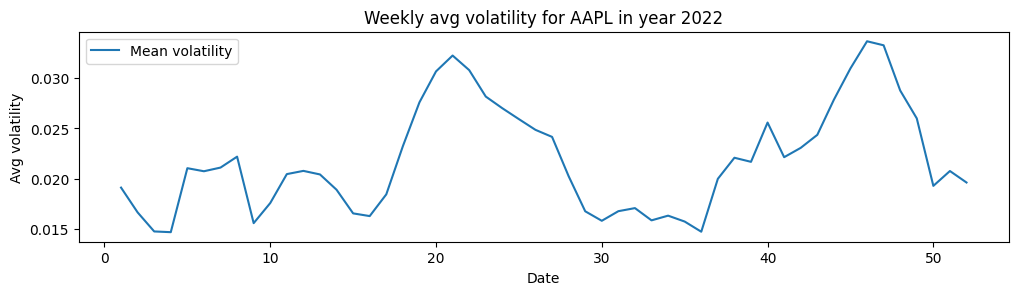

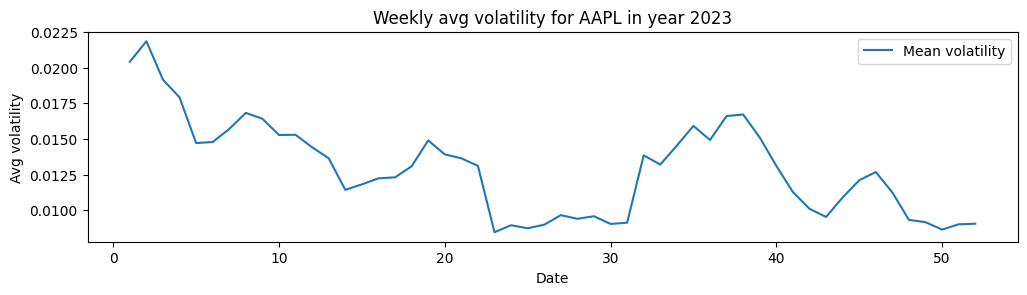

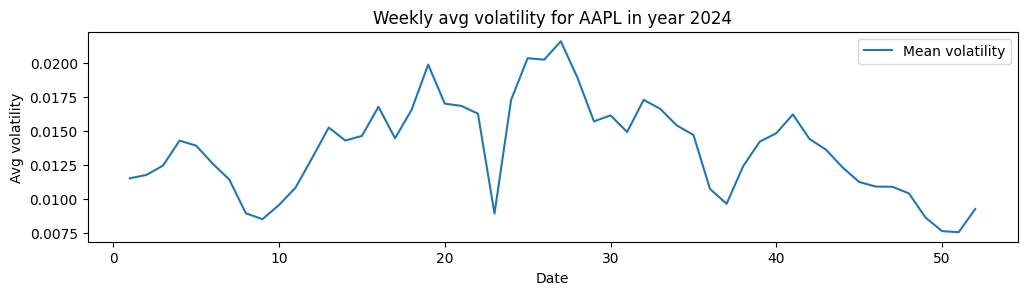

In [190]:
volatility_df = data.groupby(['Year','Week'])['Volatility'].agg(['mean'])

for year in volatility_df.index.get_level_values('Year').unique():

  year_data = volatility_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['mean'], label='Mean volatility')
  plt.title(f'Weekly avg volatility for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Avg volatility')
  plt.legend()
  plt.show()

In [ ]:
aggregated_df.groupby(['Year',"Week"])["range_fn"].mean().sort_values(ascending=False).unstack(level='Year')

In [187]:
agg_vol_df = volatility_df.groupby(['Year',"Week"])['mean'].mean().sort_values(ascending=False).unstack(level='Year')
agg_vol_df["std_dev_per_week"] = (agg_vol_df.std(axis=1) / agg_vol_df.mean(axis=1)) * 100
# agg_vol_df.sort_values(by="std_dev_per_week", ascending=True, inplace=True)
agg_vol_df.head()

Year,2020,2021,2022,2023,2024,std_dev_per_week
Week,,,,,,
1.0,NaN,0.020250,0.019110,0.020416,0.011536,23.751694
2.0,NaN,0.020912,0.016638,0.021854,0.011782,25.888219
3.0,NaN,0.020821,0.014741,0.019160,0.012468,22.991424
4.0,NaN,0.021996,0.014668,0.017919,0.014306,20.747058
5.0,0.017679,0.022612,0.021043,0.014715,0.013937,21.146328


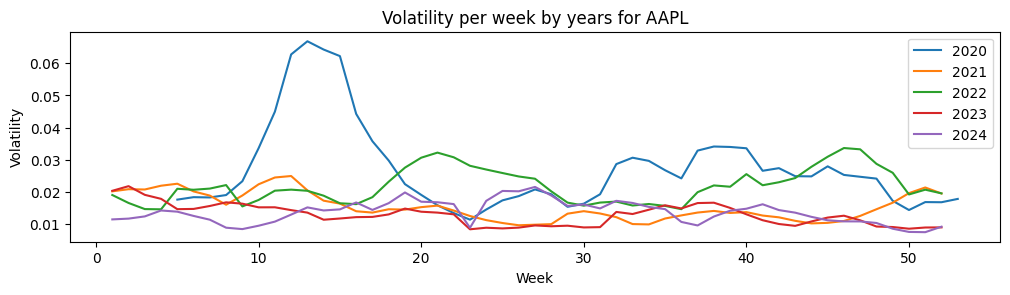

In [195]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot

for year in agg_vol_df.columns[:-1].to_list():
  plt.plot(agg_vol_df[year], label=str(year))

plt.title(f'Volatility per week by years for {ticker}')
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.legend()
plt.show()


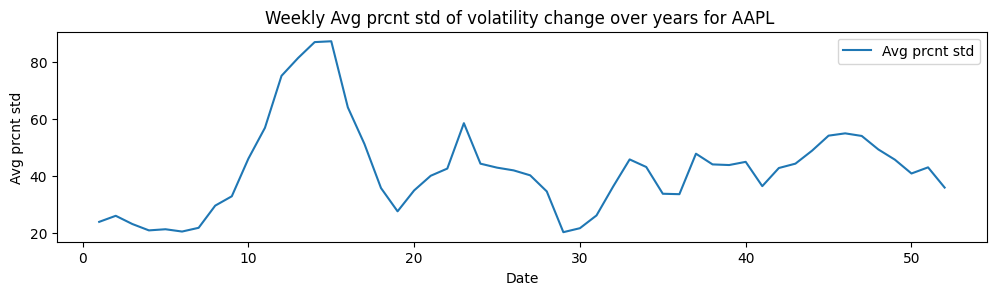

In [191]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(agg_vol_df['std_dev_per_week'], label='Avg prcnt std')
plt.title(f'Weekly Avg prcnt std of volatility change over years for {ticker} ')
plt.xlabel('Date')
plt.ylabel('Avg prcnt std')
plt.legend()
plt.show()

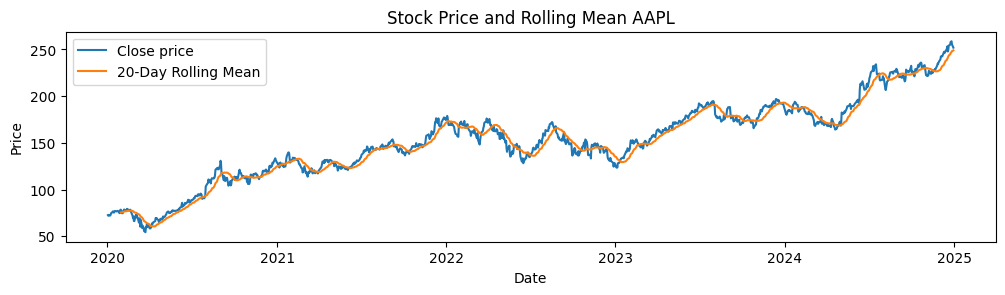

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data['Close'], label='Close price')
plt.plot(data['Rolling_Mean'], label='20-Day Rolling Mean')
plt.title(f'Stock Price and Rolling Mean {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

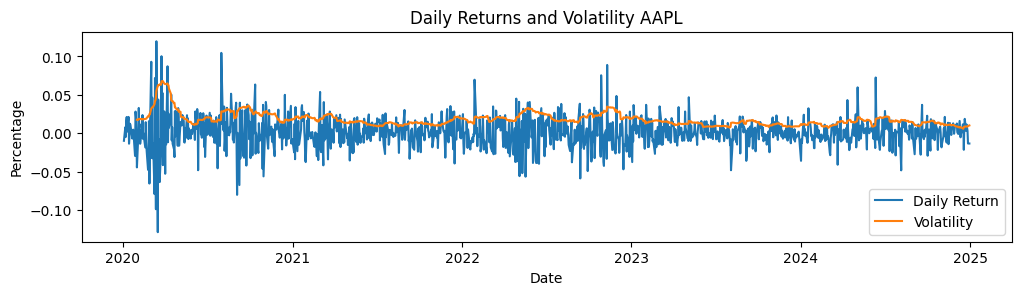

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(data['Daily_Return'], label='Daily Return')
plt.plot(data['Volatility'], label='Volatility')
plt.title(f'Daily Returns and Volatility {ticker}')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()